In [34]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

## Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

9.162739591902152 -2.813544542081985
7.01776431015837 134.38551555061707
45.562377460731625 46.568537617556274
-87.49037368910848 -70.0750551180582
75.55743562339956 20.816699484527618
39.59757312390187 76.94502538874258
27.714619213161313 19.620346287756234
-86.38394736035573 161.38819771064726
28.531721477831354 16.17203760076964
49.540797096566536 -102.05782272739339
12.534048132322482 -178.71705291981615
32.26318020399364 171.03297473478466
-1.0067995390931088 3.163711620307936
68.46893033196784 123.78367688310095
75.21271852370668 140.9575180030326
-6.8211499928089125 111.98941149352669
-15.261516828158491 -44.543617359723186
39.1810218032459 -16.164404972594866
-83.72851476181663 136.62134249754195
82.10169427183067 64.21911992732652
-81.06870948947497 21.23359767625351
-32.49869998094226 77.99743670329497
57.49297575606832 -41.62226070223065
18.49274884515235 -112.09502974874445
-52.80431076808559 -51.50412735516534
64.39617148854211 100.9728749340718
50.52311518353301 90.457382

28.125833538520283 -113.63099058487178
12.415084007578258 112.10673149185322
-72.93256026170978 19.441122559009898
14.654101335652115 18.70148340855195
81.0082530652715 128.4108100869695
-45.1925836436614 -111.95280252493231
71.58785916601141 56.12020409140703
-19.24819737233362 155.83500039052262
49.295298367974624 179.9639695999365
-76.78778160408896 172.30652233063716
-86.46563256296297 100.28679012994246
-26.96688386048684 109.38695704668146
3.623865040370603 31.4378790325392
61.76502741571335 141.91209048154593
-9.390760692090339 -76.80004403254142
23.48643210615286 -50.860792721002895
-70.64509336410758 -165.55973772781894
89.204854505978 -33.63393711211947
-48.10868824868796 -72.18395301357847
-68.08565341156788 29.86770582238327
-53.8958945544669 -69.0867616513603
23.27996415922067 -41.17435936344938
29.13139950912695 176.40809082835017
41.31159080939227 -91.30834713907183
-76.18787802722187 92.02875211602867
15.811454153520017 -86.37002215513392
0.9580309727530079 -172.8555366

In [ ]:
# from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [ ]:
# # Import the time library and the datetime module from the datetime library 
# import time
# from datetime import datetime

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bouna
Processing Record 2 of Set 1 | kloulklubed
Processing Record 3 of Set 1 | komsomolskiy
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | skjervoy
Processing Record 6 of Set 1 | kashi
Processing Record 7 of Set 1 | awjilah
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | hun
Processing Record 10 of Set 1 | carlyle
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | port-gentil
Processing Record 14 of Set 1 | zhigansk
Processing Record 15 of Set 1 | deputatskiy
Processing Record 16 of Set 1 | tuban
Processing Record 17 of Set 1 | januaria
Processing Record 18 of Set 1 | camacha
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | amderma
City not found. Skipping...
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | bambous virieux
Processing Record 23 o

Processing Record 42 of Set 4 | benguela
Processing Record 43 of Set 4 | upernavik
Processing Record 44 of Set 4 | beatrice
Processing Record 45 of Set 4 | contai
Processing Record 46 of Set 4 | jardim
Processing Record 47 of Set 4 | ossora
Processing Record 48 of Set 4 | rungata
City not found. Skipping...
Processing Record 49 of Set 4 | maputo
Processing Record 50 of Set 4 | erzin
Processing Record 1 of Set 5 | kismayo
Processing Record 2 of Set 5 | pangody
Processing Record 3 of Set 5 | cidreira
Processing Record 4 of Set 5 | sisimiut
Processing Record 5 of Set 5 | lompoc
Processing Record 6 of Set 5 | puteyets
Processing Record 7 of Set 5 | tautira
Processing Record 8 of Set 5 | roald
Processing Record 9 of Set 5 | svetlaya
Processing Record 10 of Set 5 | husavik
Processing Record 11 of Set 5 | ituni
City not found. Skipping...
Processing Record 12 of Set 5 | sesimbra
Processing Record 13 of Set 5 | general pico
Processing Record 14 of Set 5 | roebourne
Processing Record 15 of Set 

Processing Record 31 of Set 8 | richards bay
Processing Record 32 of Set 8 | avarua
Processing Record 33 of Set 8 | souillac
Processing Record 34 of Set 8 | narasannapeta
Processing Record 35 of Set 8 | beltangadi
Processing Record 36 of Set 8 | chokurdakh
Processing Record 37 of Set 8 | tokonou
Processing Record 38 of Set 8 | utiroa
City not found. Skipping...
Processing Record 39 of Set 8 | kavaratti
Processing Record 40 of Set 8 | misratah
Processing Record 41 of Set 8 | sept-iles
Processing Record 42 of Set 8 | kaitangata
Processing Record 43 of Set 8 | waddan
Processing Record 44 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 45 of Set 8 | alexandria
Processing Record 46 of Set 8 | magan
Processing Record 47 of Set 8 | norman wells
Processing Record 48 of Set 8 | kenai
Processing Record 49 of Set 8 | huarmey
Processing Record 50 of Set 8 | pecos
Processing Record 1 of Set 9 | naze
Processing Record 2 of Set 9 | idritsa
Processing Record 3 of Set 9 | wonthaggi
P

Processing Record 20 of Set 12 | bargal
City not found. Skipping...
Processing Record 21 of Set 12 | kitob
Processing Record 22 of Set 12 | koumac
Processing Record 23 of Set 12 | lazaro cardenas
Processing Record 24 of Set 12 | cap malheureux
Processing Record 25 of Set 12 | copiapo
Processing Record 26 of Set 12 | teguise
Processing Record 27 of Set 12 | esmeraldas
Processing Record 28 of Set 12 | kaitong
Processing Record 29 of Set 12 | vestmanna
Processing Record 30 of Set 12 | pangoa
Processing Record 31 of Set 12 | las cruces
Processing Record 32 of Set 12 | roswell
Processing Record 33 of Set 12 | farrukhnagar
Processing Record 34 of Set 12 | gornopravdinsk
Processing Record 35 of Set 12 | tonj
Processing Record 36 of Set 12 | yantarnyy
Processing Record 37 of Set 12 | nedjo
Processing Record 38 of Set 12 | antigonish
Processing Record 39 of Set 12 | yaan
Processing Record 40 of Set 12 | luau
Processing Record 41 of Set 12 | manavalakurichi
Processing Record 42 of Set 12 | kropo

In [7]:
# # Import the requests library.
# import requests

# # Import the API key.
# from config import weather_api_key

In [12]:
# # Get first five values from list "cities"
# cities = cities[0:5]

In [ ]:
# Starting URL for Weather Map API Call.
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [ ]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(10)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [13]:
city_data_len = len(city_data)
print(city_data_len)

576


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bouna,9.2667,-3.0000,74.16,81,95,2.93,CI,2022-10-13 06:49:47
1,Kloulklubed,7.0419,134.2556,81.10,79,100,15.93,PW,2022-10-13 06:49:48
2,Komsomolskiy,40.4272,71.7189,70.52,30,0,4.61,UZ,2022-10-13 06:49:48
3,Ushuaia,-54.8000,-68.3000,35.26,87,75,27.63,AR,2022-10-13 06:49:49
4,Skjervoy,70.0311,20.9714,39.20,72,100,7.25,NO,2022-10-13 06:49:50
5,Kashi,39.4547,75.9797,63.61,25,1,4.47,CN,2022-10-13 06:49:50
6,Awjilah,29.1081,21.2869,79.86,32,0,5.14,LY,2022-10-13 06:49:51
7,Bluff,-46.6000,168.3333,47.43,71,2,9.35,NZ,2022-10-13 06:49:51
8,Hun,29.1268,15.9477,80.46,24,7,7.36,LY,2022-10-13 06:49:52
9,Carlyle,38.6103,-89.3726,54.21,67,97,1.01,US,2022-10-13 06:49:52


In [15]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
# Assign district summary for columns in the new order
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bouna,CI,2022-10-13 06:49:47,9.2667,-3.0000,74.16,81,95,2.93
1,Kloulklubed,PW,2022-10-13 06:49:48,7.0419,134.2556,81.10,79,100,15.93
2,Komsomolskiy,UZ,2022-10-13 06:49:48,40.4272,71.7189,70.52,30,0,4.61
3,Ushuaia,AR,2022-10-13 06:49:49,-54.8000,-68.3000,35.26,87,75,27.63
4,Skjervoy,NO,2022-10-13 06:49:50,70.0311,20.9714,39.20,72,100,7.25
5,Kashi,CN,2022-10-13 06:49:50,39.4547,75.9797,63.61,25,1,4.47
6,Awjilah,LY,2022-10-13 06:49:51,29.1081,21.2869,79.86,32,0,5.14
7,Bluff,NZ,2022-10-13 06:49:51,-46.6000,168.3333,47.43,71,2,9.35
8,Hun,LY,2022-10-13 06:49:52,29.1268,15.9477,80.46,24,7,7.36
9,Carlyle,US,2022-10-13 06:49:52,38.6103,-89.3726,54.21,67,97,1.01


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [ ]:
# Import the time module.
# import time
# # Get today's date in seconds.
# today = time.time()
# today

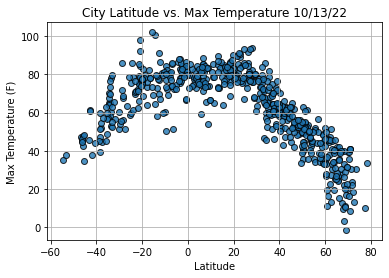

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

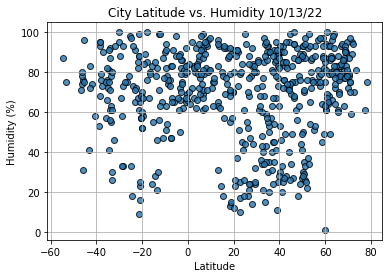

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

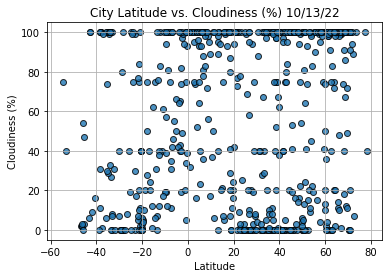

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

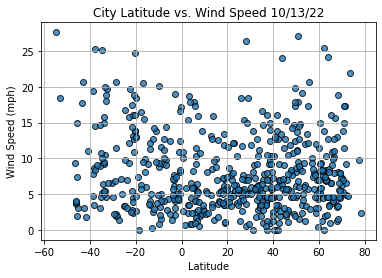

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bouna,CI,2022-10-13 06:49:47,9.2667,-3.0000,74.16,81,95,2.93
1,Kloulklubed,PW,2022-10-13 06:49:48,7.0419,134.2556,81.10,79,100,15.93
2,Komsomolskiy,UZ,2022-10-13 06:49:48,40.4272,71.7189,70.52,30,0,4.61
4,Skjervoy,NO,2022-10-13 06:49:50,70.0311,20.9714,39.20,72,100,7.25
5,Kashi,CN,2022-10-13 06:49:50,39.4547,75.9797,63.61,25,1,4.47


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

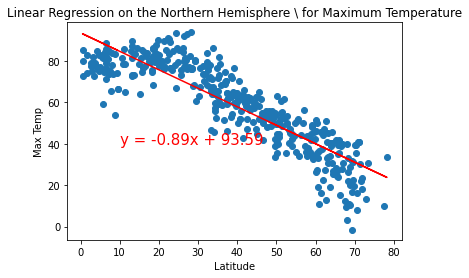

In [26]:

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

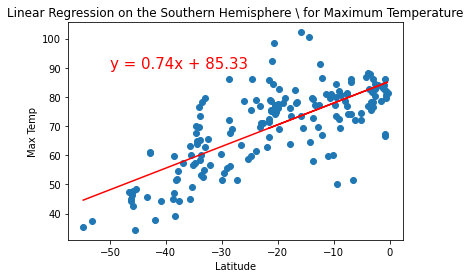

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))

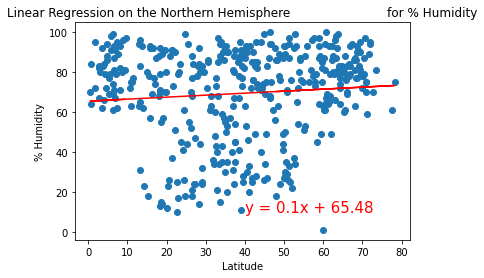

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

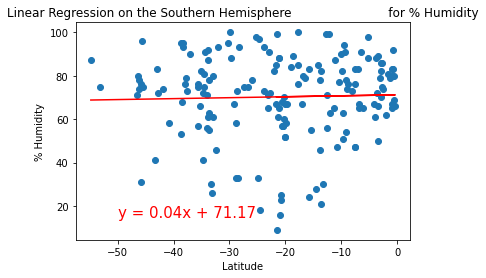

In [29]:

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

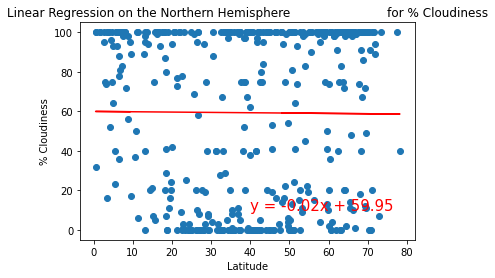

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

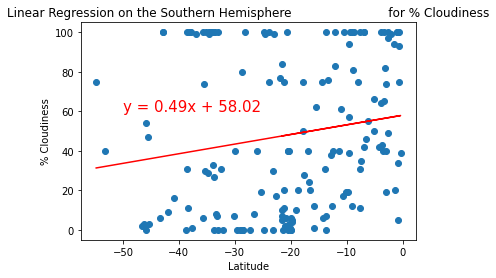

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

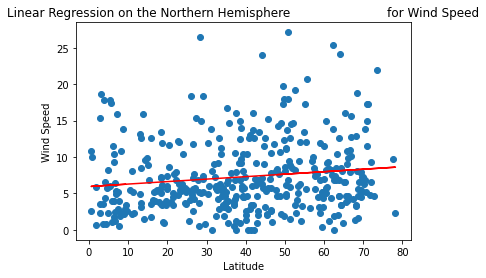

In [32]:

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

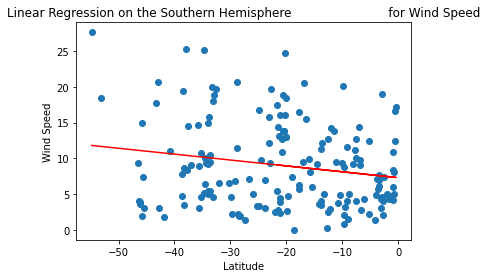

In [33]:

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))